# Exploration Velib - Data Academy

# Importing libraries
- We rely heavily on `pandas`, `matplotlib` libraries for descriptive statistics.
- We also want to introduce you to `pandas-profiling`, a powerful tool for understanding your data

In [43]:
import os
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

import pandas_profiling

# Loading the data
We select the data from the data directory. The `parse_dates` option directly converts the `datetime` column to the right `dtype`.

In [2]:
data_dir = 'data'
df = pd.read_csv(os.path.join(data_dir, 'data.csv'), parse_dates=['datetime'])

# Data types
We check the types of the data.

In [4]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

# Number of elements per variable
We check the number of values per variable.

In [3]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

### Analysis :
    - Seasion, Holiday, Workingday, Weather are considered as continuous data whereas they have a lof number of different values => they should be considered as categorical
    - datetime is date format which is good

# Null values

In [5]:
len(df)

10886

In [6]:
len(df.dropna())

10886

#### Analysis : 
    - there is no Null values

# Pandas profiling report

In [7]:
pandas_profiling.ProfileReport(df)

Number of variables,12
Number of observations,10886
Total Missing (%),0.0%
Total size in memory,1020.6 KiB
Average record size in memory,96.0 B
Numeric,7
Categorical,0
Boolean,2
Date,1
Text (Unique),0
Rejected,2


Analyse de pandas profiling sur les 12 variables :
    - pas de valeurs manquantes
    - 9,1% de zeros pour "casual" et 12% de zeros pour windspeed
    - holiday, season, weather, working day sont catégorielles
    - forte correlation entre atemp et temp

Analyse de chacune des variables : 
    - atemp (98% de correlation avec temp, pas de nécéssité de l'étudier)
    - casual : 9,1% de valeurs zeros (correspondant à aucune location), pas de valeur aberhante, mediane à 17 avec une MAD à 34
    - datetime : RAD
    - holiday : 97,1% de 0
    - humidity : min 0 (0,2%) peut être aberhantes, sinon RAD
    - registered : no zeros, wide range (0 to 886)
    - season : categorial, equidistribué entre les 4 saisons
    - temp : pas de valeurs aberhantes
    - weather : catégorielle (1 à 4), valeur 4 très peu représentée (0,0%), à réatribuer
    - windspeed : 12% de zeros, pas de valeurs aberhantes, attention aux décimales
    - workinday : boolean, RAD

# Univariate and bivariate plots

In [8]:
def plot_univariate(column_name):
    plt.hist(df[column_name])
    plt.title("Univariate plotting of : {}".format(column_name))
    plt.show()
    
def plot_bivariate(column_x, column_y):
    plt.scatter(df[column_x],df[column_y])
    plt.title("Bivariate plotting of {} as a function of {} ".format(column_y, column_x))
    plt.show()
    
def plot_boxplot_season(column_x):
    df_1=df[df.season ==1]
    df_2=df[df.season ==2]
    df_3=df[df.season ==3]
    df_4=df[df.season ==4]
    data = [df_1[column_x],df_2[column_x],df_3[column_x],df_3[column_x]]
    plt.title("Box plot of {} as a function of season ".format(column_x))
    plt.boxplot(data)
    BoxName = ['season 1','season 2','season 3','season 4']
    pylab.xticks([1,2,3,4], BoxName)
    plt.show()

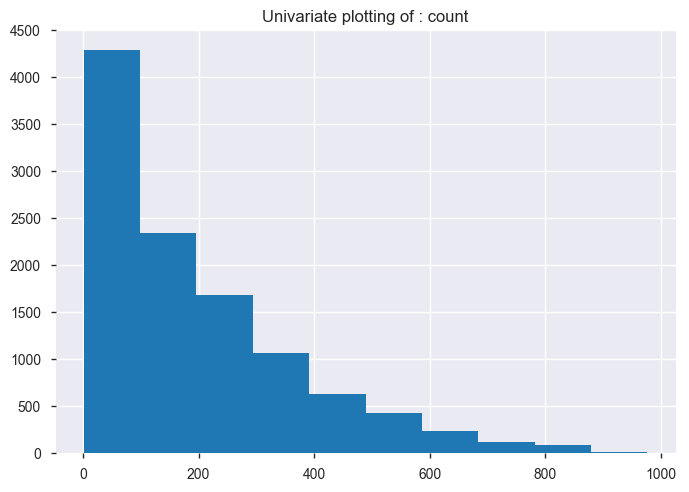

In [9]:
plot_univariate("count")

La distribution de count est très écrasée (nous retrouvons des valeurs entre 0 et 900), un traitement spécifique devra alors êter mis en place pendant le feature engineering (log-transform ?)

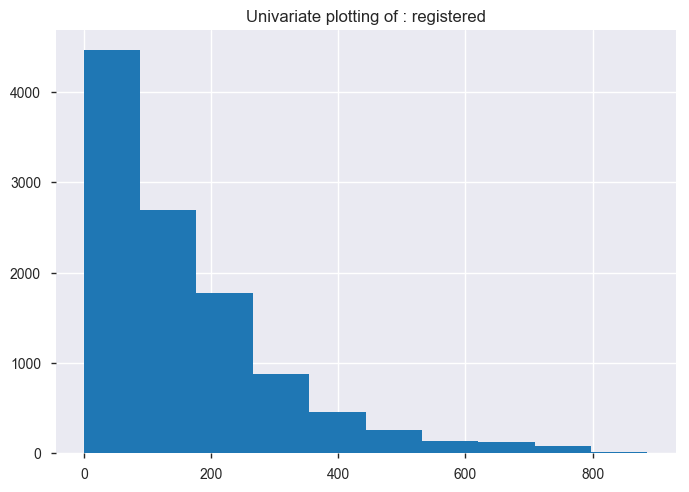

In [10]:
plot_univariate("registered")

La distribution de registered est très similaires à celle de count (voir analyse ci-après).

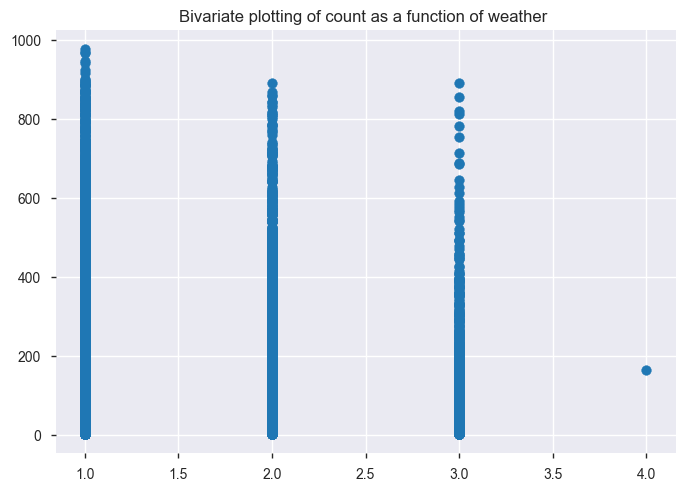

In [11]:
plot_bivariate("weather", "count")

Etude : 
- Une seule valeur de 4 pour weather, une action spécifique doit être réalisée en feature engineering
- Trop de overlapping sur ces graphiques, nous devrions peut être représenter des distributionsm

In [12]:
df.season.value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


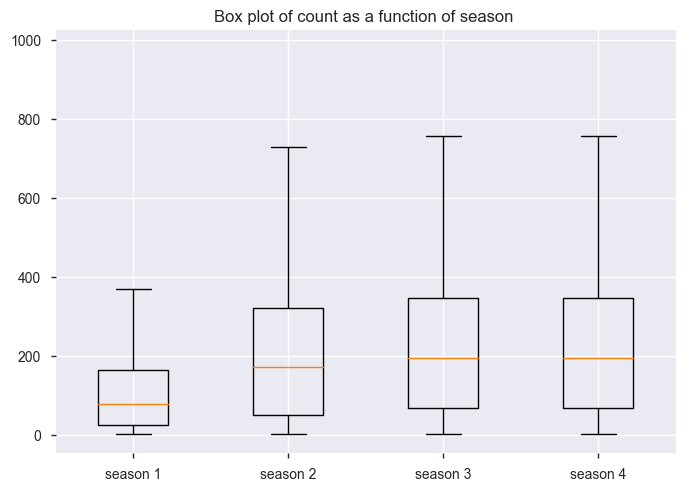

In [13]:
plot_boxplot_season("count")

Etude : 
    - il y a beaucoup moins d'utilisation de velibs en saison 1 que dans les autres saisons bien que le jeu de données soit très bien réparti entre les 4 saisons

## Identification que casual + registered = count

In [14]:
(df["count"] == df["registered"] + df["casual"]).value_counts()

True    10886
dtype: int64

Etude : les deux colonnes registered et casual égalent la colonne casual !

# Quid des jours travaillés ?

In [15]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [16]:
df_work = df[df.workingday == 1][["registered","casual","count"]]
df_work["percent_registered"] = df_work["registered"]/df_work["count"]
df_work["percent_casual"] = df_work["casual"]/df_work["count"]

In [17]:
df_work.describe()

,registered,casual,count,percent_registered,percent_casual
count,7412.000000,7412.000000,7412.000000,7412.000000,7412.000000
mean,167.904209,25.107663,193.011873,0.864039,0.135961
std,165.817966,28.601591,184.513659,0.121171,0.121171
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,36.000000,3.000000,41.000000,0.800000,0.044643
50%,127.000000,14.000000,151.000000,0.888889,0.111111
75%,233.000000,39.000000,277.000000,0.955357,0.200000
max,886.000000,240.000000,977.000000,1.000000,1.000000


In [18]:
df_weekend = df[df.workingday == 0][["registered","casual","count"]]
df_weekend["percent_registered"] = df_weekend["registered"]/df_weekend["count"]
df_weekend["percent_casual"] = df_weekend["casual"]/df_weekend["count"]

In [19]:
df_weekend.describe()

,registered,casual,count,percent_registered,percent_casual
count,3474.00000,3474.000000,3474.000000,3474.000000,3474.000000
mean,129.19833,59.308290,188.506621,0.754215,0.245785
std,108.65734,72.669078,173.724015,0.138615,0.138615
min,0.00000,0.000000,1.000000,0.000000,0.000000
25%,36.00000,6.000000,44.000000,0.652557,0.140000
50%,99.00000,25.000000,128.000000,0.755619,0.244381
75%,207.00000,90.000000,304.000000,0.860000,0.347443
max,601.00000,367.000000,783.000000,1.000000,1.000000


Bilan : en moyenne, les velibs les plus utilisés le sont sous contrat (87%) néanmoins les weekend ce ratio est plus faible (75%)

## Matrice de correlation

In [20]:
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


Bilan : Correlation forte entre temp et atemp !

# Etudes temporelles

## Etude des différences entre les 2 années

In [21]:
type(df.datetime[0])

pandas._libs.tslib.Timestamp

In [35]:
df_2011 = df.loc[df.datetime.dt.year == 2011]
df_2012 = df.loc[df.datetime.dt.year == 2012]

In [39]:
df_2011["percent_registered"] = df_2011["registered"]/df_2011["count"]
df_2011["percent_casual"]= df_2011["casual"]/df_2011["count"]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
df_2012["percent_registered"] = df_2012["registered"]/df_2012["count"]
df_2012["percent_casual"]= df_2012["casual"]/df_2012["count"]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [41]:
df_2011.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,percent_registered,percent_casual
count,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000
mean,2.511988,0.026558,0.682036,1.426411,19.751988,23.157086,63.405017,12.924144,28.737920,115.485430,144.223349,0.819168,0.180832
std,1.114603,0.160804,0.465728,0.647407,7.951694,8.619132,19.780518,8.354137,39.554419,108.847868,133.312123,0.147044,0.147044
min,1.000000,0.000000,0.000000,1.000000,2.460000,3.030000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.120000,15.910000,49.000000,7.001500,3.000000,27.000000,32.000000,0.735294,0.065921
50%,3.000000,0.000000,1.000000,1.000000,19.680000,23.485000,64.000000,12.998000,13.000000,91.000000,111.000000,0.845521,0.154479
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,79.000000,19.001200,38.000000,168.000000,210.000000,0.934079,0.264706
max,4.000000,1.000000,1.000000,3.000000,38.540000,43.940000,100.000000,56.996900,272.000000,567.000000,638.000000,1.000000,1.000000


In [42]:
df_2012.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,percent_registered,percent_casual
count,5464.000000,5464.000000,5464.000000,5464.000000,5464.000000,5464.000000,5464.000000,5464.000000,5464.000000,5464.000000,5464.000000,5464.000000,5464.000000
mean,2.501281,0.030564,0.679722,1.410505,20.706051,24.149254,60.379575,12.675605,43.250000,195.310944,238.560944,0.838740,0.161260
std,1.117808,0.172148,0.466626,0.620038,7.600352,8.300001,18.578008,7.970774,57.584101,174.709050,208.114003,0.125335,0.125335
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,16.000000,0.000000,0.000000,1.000000,1.000000,0.214286,0.000000
25%,2.000000,0.000000,0.000000,1.000000,14.760000,17.425000,46.000000,7.001500,5.000000,51.000000,59.000000,0.755683,0.057143
50%,3.000000,0.000000,1.000000,1.000000,21.320000,24.240000,60.000000,11.001400,20.000000,161.000000,199.000000,0.862297,0.137703
75%,4.000000,0.000000,1.000000,2.000000,27.060000,31.060000,76.000000,16.997900,61.000000,281.000000,354.000000,0.942857,0.244317
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,47.998800,367.000000,886.000000,977.000000,1.000000,0.785714


In [22]:
def plot_boxplot_year(column_x):
    df_1 = df.loc[df.datetime.dt.year == 2011]
    df_2 = df.loc[df.datetime.dt.year == 2012]
    data = [df_1[column_x],df_2[column_x]]
    plt.title("Box plot of {} as a function of year".format(column_x))
    plt.boxplot(data)
    BoxName = ['2011','2012']
    pylab.xticks([1,2], BoxName)
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


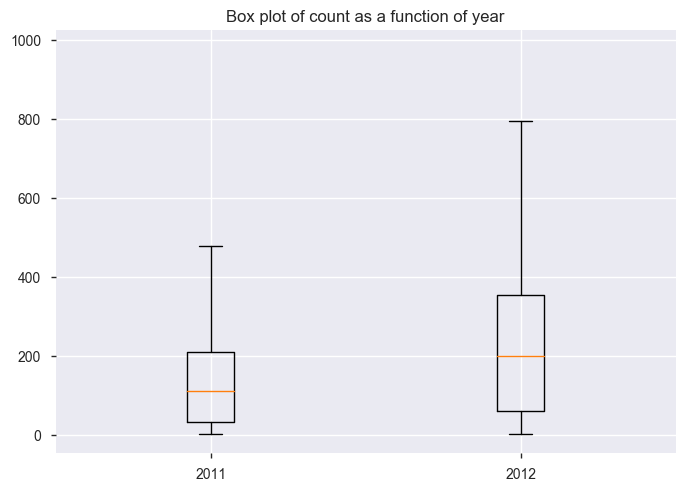

In [23]:
plot_boxplot_year("count")

Etude : 
    - Il y a, de manière générale, une utilisation plus forte des vélibs en 2012 qu'en 2011 (238 contre 144)
    - Les utilisations sont similaires entre 2011 et 2012 pour Registered (82% et 84%) et Casual (18% et 16%)

## Etude de la périodicité de l'utilisation

In [24]:
def plot_timeline(first_date, last_date, column):
    df_month = df[(df.datetime >= first_date) & (df.datetime < last_date)]
    plt.plot(
        df_month.datetime,
        df_month[column]
    )
    plt.xticks(rotation=90)
    plt.title("{} between {} and {}".format(column,str(first_date),str(last_date)))
    plt.show()
    
def plot_timeline_2(first_date, last_date):
    df_month = df[(df.datetime >= first_date) & (df.datetime < last_date)]
    plt.plot(
        df_month.datetime,
        df_month["count"],
        df_month.datetime,
        df_month["registered"],
        df_month.datetime,
        df_month["casual"],
    )
    plt.xticks(rotation=90)
    plt.title("Plot between {} and {}".format(str(first_date),str(last_date)))
    plt.show()

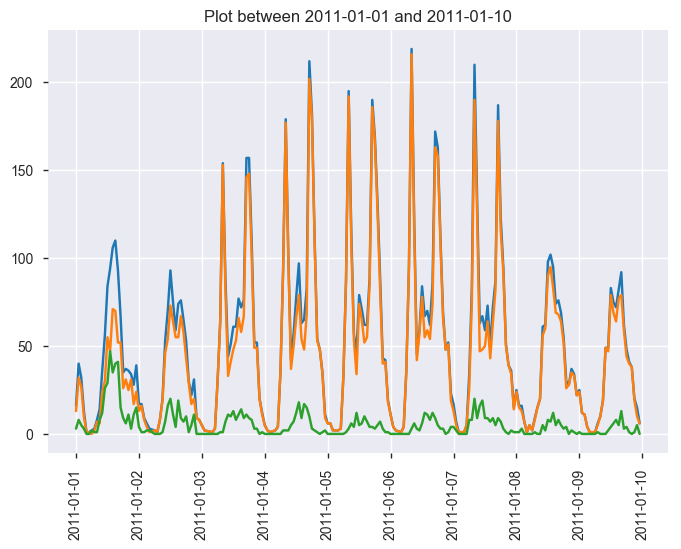

In [25]:
first_date = datetime.date(2011,1,1)
last_date = datetime.date(2011,1,10)
plot_timeline_2(first_date, last_date)

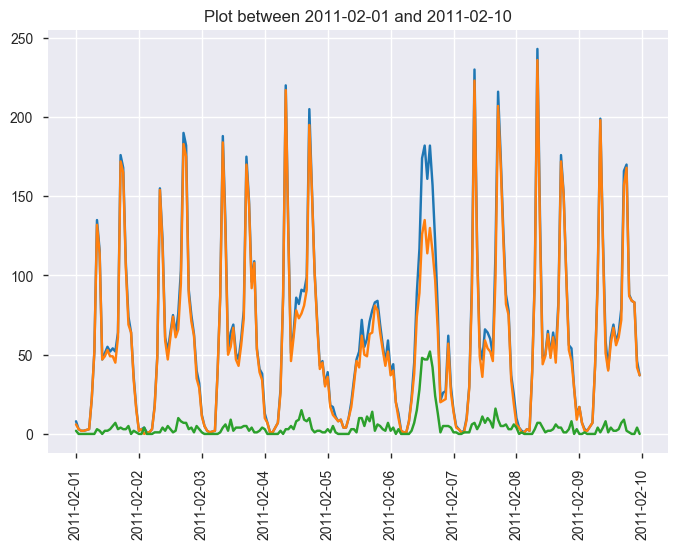

In [26]:
first_date = datetime.date(2011,2,1)
last_date = datetime.date(2011,2,10)
plot_timeline_2(first_date, last_date)

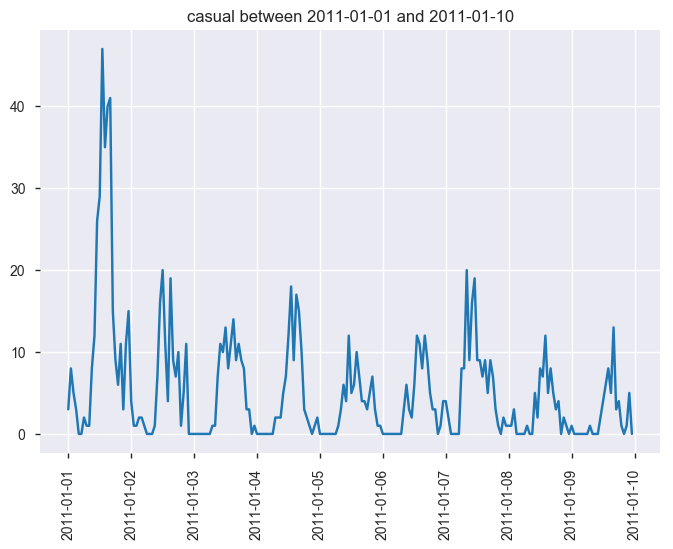

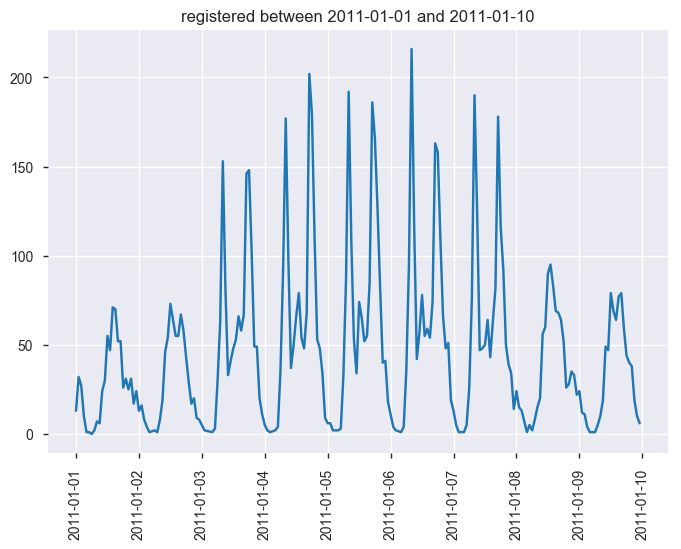

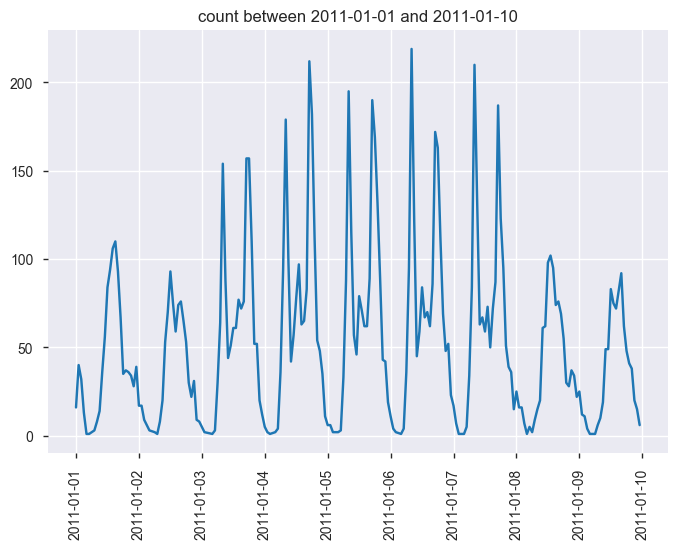

In [27]:
first_date = datetime.date(2011,1,1)
last_date = datetime.date(2011,1,10)

plot_timeline(first_date, last_date,"casual")
plot_timeline(first_date, last_date,"registered")
plot_timeline(first_date, last_date,"count")

Etude : 
- De manière générale, il y a moins d'utilisation des vélibs le weekend
- Il semblerait que le 1er janvier (comme les autres dimanche), il y ait une utilisation double des vélibs en mode "casual"
- De plus, il y a une varaition cyclique de l'utilisation des velibs sur les jours de la semaine et SURTOUT l'importance des heures dans l'utilisation des velibs

# -------------------------------------------------

# Bilan de l'étude 

Quid des variables :
   - holiday, season, weather, working day : catégorielles (dummyfication)
   - atemp :  forte correlation avec temp (pas de traitement de atemp)
   - weather : catégorielle (1 à 4), valeur 4 très peu représentée (0,0%)
   - count : distribution très écrasée (nous retrouvons des valeurs entre 0 et 900) : log-transform ?
   - workinday : boolean, RAD

Etude temporelle : 
- Moins d'utilisation des vélibs le weekend et en saison 1 
- Varaition cyclique de l'utilisation des velibs sur les jours de la semaine
- Importance des heures dans l'utilisation des velibs